## Analyze carbon source data

This notebook analyzes the carbon source data collected on 07.18.2017

In [27]:
#Import packages
import numpy as np 
import os
os.environ["THEANO_FLAGS"] = "device=gpu1"

import tifffile as tiff
from skimage.io import imread
from skimage.measure import label, regionprops
import scipy
import matplotlib.pyplot as plt
import cPickle as pickle
from SLIP_functions import analyze_well, analyze_plate, segment_SLIP, plot_slip_well
from SLIP_functions import plot_slip_joint_plot, fit_kde, compute_p_values
import seaborn as sns
import pandas as pd

sns.set_context('notebook', font_scale = 1.1)
sns.set_style('white')
sns.set_style('ticks')

#Activate matplotlib inline
%matplotlib inline

#Define root directory path
root_direc = '/media/vanvalen/fe0ceb60-f921-4184-a484-b7de12c1eea6/keio_screen/07.18.2017/carbon_source/'

#Define directory path to infection data (all positions)
data_direc = os.path.join(root_direc, 'data')

#Define directory path to control data (all positions)
control_direc = os.path.join(root_direc, 'data')

#Define directory path to where you want to store neural net outputs. 
#mask directories must exist at run time!
mask_direc = os.path.join(root_direc, 'masks')
control_mask_direc = os.path.join(root_direc,'control_masks')

In [28]:
#Define which wells were used
row_control = ['A']
row_data = ['B','C','D','E','G']
col_control = [1,2,3,4,5,6,7,8,9,10,11,12]
col_data = [1,2,3,4,5,6,7,8,9,10,11,12]

In [4]:
#Segment the control wells
segment_SLIP(control_direc, control_mask_direc, alphabet = row_control, columns= col_control)

['A'] [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
Segmenting Position A1


cnn_functions.py:255: UserWarning: DEPRECATION: the 'padding' parameter is not going to exist anymore as it is going to be replaced by the parameter 'pad'.
  pooled_array +=[pool_2d(input_image[:, :, offset_x::stride, offset_y::stride], pool_size, stride = (1,1), mode = mode, padding = (0,0), ignore_border = True)]


Segmenting Position A2
Segmenting Position A3
Segmenting Position A4
Segmenting Position A5
Segmenting Position A6
Segmenting Position A7
Segmenting Position A8
Segmenting Position A9
Segmenting Position A10
Segmenting Position A11
Segmenting Position A12


In [5]:
#Segment the infected wells
segment_SLIP(data_direc, mask_direc, alphabet = row_data, columns= col_data)

['B', 'C', 'D', 'E', 'G'] [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
Segmenting Position B1
Segmenting Position B2
Segmenting Position B3
Segmenting Position B4
Segmenting Position B5
Segmenting Position B6
Segmenting Position B7
Segmenting Position B8
Segmenting Position B9
Segmenting Position B10
Segmenting Position B11
Segmenting Position B12
Segmenting Position C1
Segmenting Position C2
Segmenting Position C3
Segmenting Position C4
Segmenting Position C5
Segmenting Position C6
Segmenting Position C7
Segmenting Position C8
Segmenting Position C9
Segmenting Position C10
Segmenting Position C11
Segmenting Position C12
Segmenting Position D1
Segmenting Position D2
Segmenting Position D3
Segmenting Position D4
Segmenting Position D5
Segmenting Position D6
Segmenting Position D7
Segmenting Position D8
Segmenting Position D9
Segmenting Position D10
Segmenting Position D11
Segmenting Position D12
Segmenting Position E1
Segmenting Position E2
Segmenting Position E3
Segmenting Position E4
Segme

In [ ]:
# Quantify the data from the control wells
mean_FITC_control, mean_cherry_control = analyze_plate(control_direc, control_mask_direc, pos_list = range(9), row_names = row_control, col_names = col_control)
mean_FITC_control_name = os.path.join(root_direc, 'mean_FITC_control.pkl')
mean_cherry_control_name = os.path.join(root_direc, 'mean_cherry_control.pkl')
pickle.dump(mean_FITC_control, open(mean_FITC_control_name, 'wb'))
pickle.dump(mean_cherry_control, open(mean_cherry_control_name, 'wb'))

Processing well A1


In [4]:
# Quantify the data from the infection wells
mean_FITC, mean_cherry = analyze_plate(data_direc, mask_direc, pos_list = range(9), row_names = row_data, col_names = col_data)
mean_FITC_name = os.path.join(root_direc, 'mean_FITC.pkl')
mean_cherry_name = os.path.join(root_direc, 'mean_cherry.pkl')
pickle.dump(mean_FITC, open(mean_FITC_name, 'wb'))
pickle.dump(mean_cherry, open(mean_cherry_name, 'wb'))

Processing well B1
Processing well B2
Processing well B3
Processing well B4
Processing well B5
Processing well B6
Processing well B7
Processing well B8
Processing well B9
Processing well B10
Processing well B11
Processing well B12
Processing well C1
Processing well C2
Processing well C3
Processing well C4
Processing well C5
Processing well C6
Processing well C7
Processing well C8
Processing well C9
Processing well C10
Processing well C11
Processing well C12
Processing well D1
Processing well D2
Processing well D3
Processing well D4
Processing well D5
Processing well D6
Processing well D7
Processing well D8
Processing well D9
Processing well D10
Processing well D11
Processing well D12
Processing well E1
Processing well E2
Processing well E3
Processing well E4
Processing well E5
Processing well E6
Processing well E7
Processing well E8
Processing well E9
Processing well E10
Processing well E11
Processing well E12
Processing well G1
Processing well G2
Processing well G3
Processing well G4


In [29]:
#Load saved data
mean_FITC_name = os.path.join(root_direc, 'mean_FITC.pkl')
mean_cherry_name = os.path.join(root_direc, 'mean_cherry.pkl')
mean_FITC = pickle.load(open(mean_FITC_name, 'rb'))
mean_cherry = pickle.load(open(mean_cherry_name, 'rb'))

mean_FITC_control_name = os.path.join(root_direc, 'mean_FITC_control.pkl')
mean_cherry_control_name = os.path.join(root_direc, 'mean_cherry_control.pkl')
mean_FITC_control = pickle.load(open(mean_FITC_control_name, 'rb'))
mean_cherry_control = pickle.load(open(mean_cherry_control_name, 'rb'))

#Clean the 11th well
temp = mean_FITC_control['A11']
temp2 = mean_cherry_control['A11']

for j in xrange(len(temp)):
    if temp[j] > 300 or temp2[j]>100:
        temp[j] = None
        temp2[j] = None

temp = [x for x in temp if x is not None]
temp2 = [y for y in temp2 if y is not None]

mean_FITC_control['A11'] = temp
mean_cherry_control['A11'] = temp2

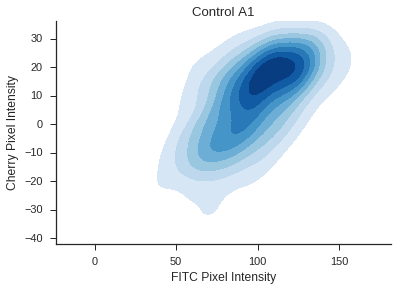

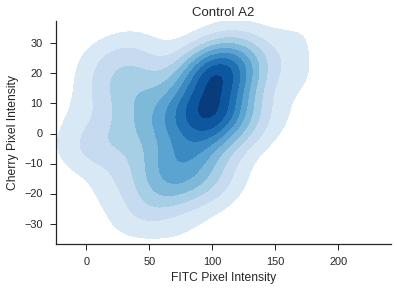

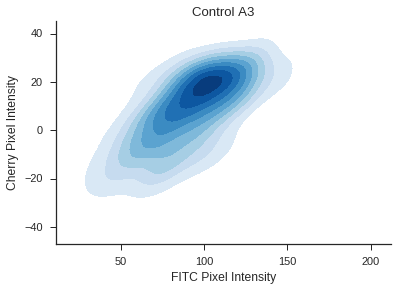

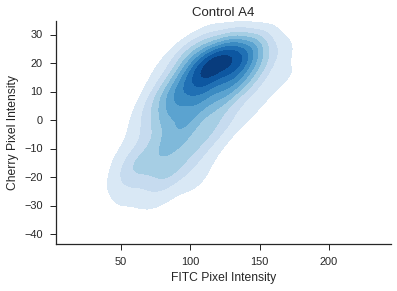

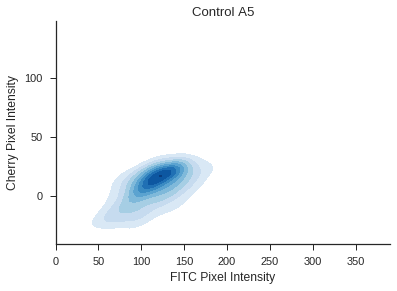

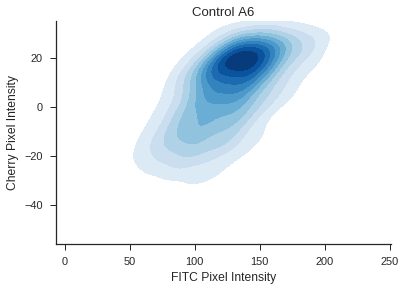

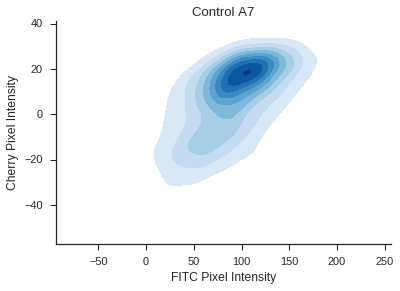

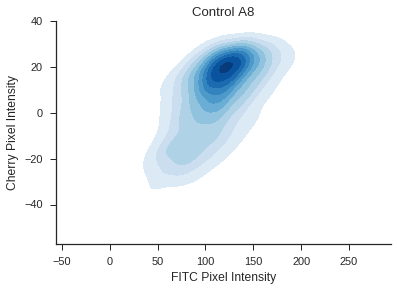

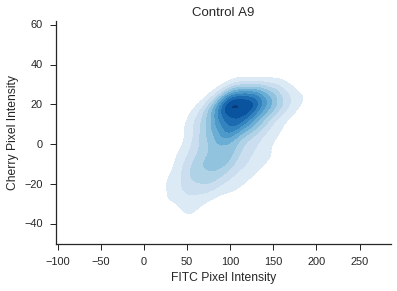

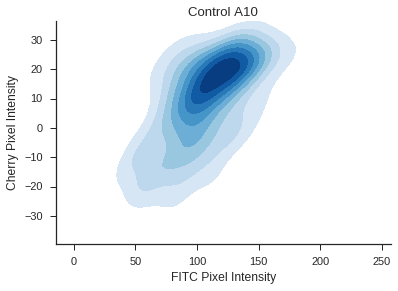

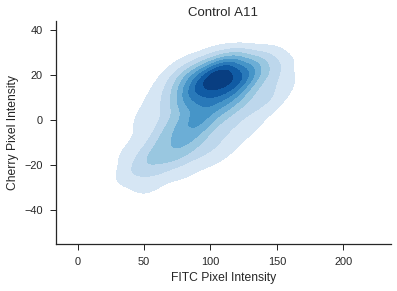

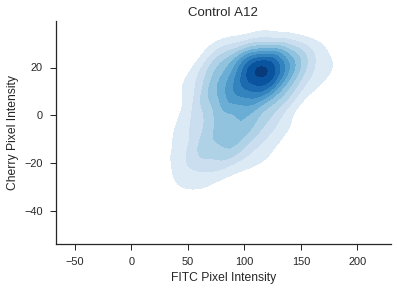

In [30]:
#Plot the data from the control plate
for well in ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12']:
#     plot_slip_well(mean_FITC_control, mean_cherry_control, well = well, title = 'Control ' + well)
    fig = plt.figure()
    fitc_list = np.array(mean_FITC_control[well])
    cherry_list = np.array(mean_cherry_control[well])
    sns.kdeplot(fitc_list, cherry_list, cmap="Blues", shade=True, shade_lowest=False)
    plt.xlabel('FITC Pixel Intensity')
    plt.ylabel('Cherry Pixel Intensity')
    plt.title('Control ' + well)
    xmax = max(fitc_list)
    xmin = min(fitc_list)
    ymax = max(cherry_list)
    ymin = min(cherry_list)
    plt.axis([xmin, xmax, ymin, ymax])
    sns.despine()



In [31]:
# Define dictionary with conditions
carbon_source = {}
carbon_source['maltose'] = [12, 11, 10]
carbon_source['glycerol'] = [9,8,7]
carbon_source['glucose'] = [6,5,4]
carbon_source['galactose'] = [3,2,1]

phage_added = {}
phage_added['0'] = 'A'
phage_added['0.5'] = 'B'
phage_added['1'] = 'C'
phage_added['5'] = 'D'
phage_added['10'] = 'E'
phage_added['20'] = 'G'

reverse_phage_added = {}
reverse_phage_added['A'] = 0
reverse_phage_added['B'] = 0.5
reverse_phage_added['C'] = 1
reverse_phage_added['D'] = 5
reverse_phage_added['E'] = 10
reverse_phage_added['G'] = 20


In [32]:
#Print the number of cells in each well
for key in mean_FITC_control.keys():
    print key, len(mean_FITC_control[key])
    
for key in mean_FITC.keys():
    print key, len(mean_FITC[key])

A11 3157
A10 785
A12 3440
A1 708
A3 419
A2 200
A5 807
A4 2350
A7 9351
A6 1491
A9 6978
A8 6184
B8 2237
D10 1936
D11 1436
D12 1844
E11 1922
E10 1690
E12 1573
B12 2977
B10 588
B11 1279
C12 4404
C11 1752
C10 1403
G7 6361
G6 618
G5 1289
G4 1301
G3 578
G2 481
G1 451
G9 9003
G8 4215
C9 530
C8 2630
E9 3255
E8 898
C3 145
C2 292
C1 363
E6 692
E1 627
C6 429
C5 266
C4 169
B2 401
B3 211
E5 882
E4 671
B1 771
G12 2721
G11 1118
G10 2612
D5 668
E7 2437
C7 642
B9 1391
B4 1052
B5 888
B6 429
B7 7774
E3 245
D8 1447
D9 495
D6 296
D7 903
D4 330
E2 229
D2 233
D3 271
D1 517


In [33]:
# Fit a KDE estimator to the no infection controls
kernels = {}
for well in ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12']:
    kernels[well] = fit_kde(mean_FITC_control, mean_cherry_control, well)

In [15]:
# Compute the probability of observing each data point assuming there was no infection
p_values_dict = {}
for row in row_data:
    for col in [1,2,3,4,5,6,7,8,9,10,11,12]:
        well = row + str(col)
        print well
        kernel = kernels['A' + str(col)]
        p_values_dict[well] = np.array(compute_p_values(mean_FITC, mean_cherry, well, kernel))

B1
B2
B3
B4
B5
B6
B7
B8
B9
B10
B11
B12
C1
C2
C3
C4
C5
C6
C7
C8
C9
C10
C11
C12
D1
D2
D3
D4
D5
D6
D7
D8
D9
D10
D11
D12
E1
E2
E3
E4
E5
E6
E7
E8
E9
E10
E11
E12
G1
G2
G3
G4
G5
G6
G7
G8
G9
G10
G11
G12


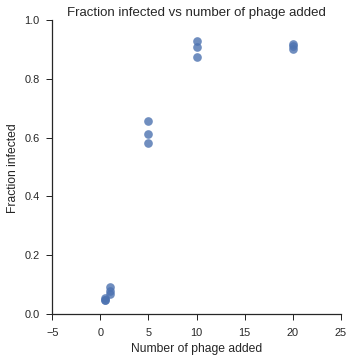

In [34]:
#Compute the fraction infected in each well and plot
conc_list = []
fraction_infected_list = []
for well in ['B10', 'B11', 'B12', 'C10', 'C11', 'C12', 'D10', 'D11', 'D12','E10', 'E11', 'E12','G10', 'G11', 'G12',]: #p_values_dict.keys():
    p_value = p_values_dict[well]
    fraction_infected = np.float(np.where(p_value < 0.01)[0].shape[0])/np.float(p_value.shape[0])
    conc_list += [reverse_phage_added[well[0]]]
    fraction_infected_list += [fraction_infected]

d = {'Number of phage added': conc_list, 'Fraction infected': fraction_infected_list}
dataframe = pd.DataFrame(data = d)
grid = sns.lmplot('Number of phage added', 'Fraction infected', dataframe, fit_reg = False, scatter_kws={"s": 75})
ax = grid.axes[0][0]
ax.set_title('Fraction infected vs number of phage added')
#ax.set_xscale('log')




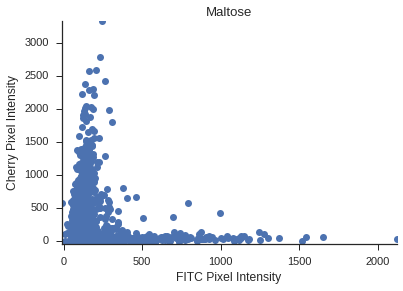

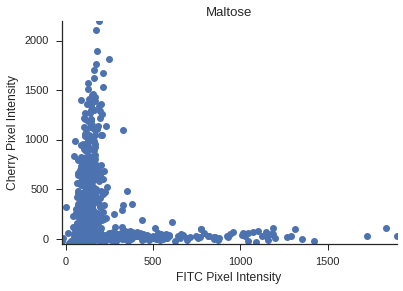

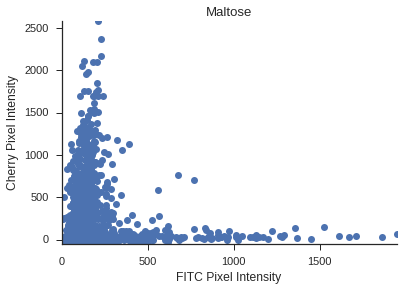

In [35]:
#Plot the scatter plot of intensities with the uninfected cells removed
for well in ['D10', 'D11', 'D12']:
    p_value = p_values_dict[well]
    infected_cells = np.where(p_value < 0.01)[0]
    plot_slip_well(mean_FITC, mean_cherry, well = well, title = str('Maltose'))
    sns.despine()

B9 0.90625 29 32
B8 0.893617021277 42 47
B7 0.936567164179 251 268
C9 0.933333333333 14 15
C8 0.846153846154 33 39
C7 0.947368421053 18 19
D9 0.666666666667 34 51
D8 0.782608695652 36 46
D7 0.75 21 28
E9 0.922365988909 499 541
E8 0.805555555556 116 144
E7 0.938947368421 446 475
G9 0.509259259259 495 972
G8 0.65371024735 370 566
G7 0.584971098266 506 865


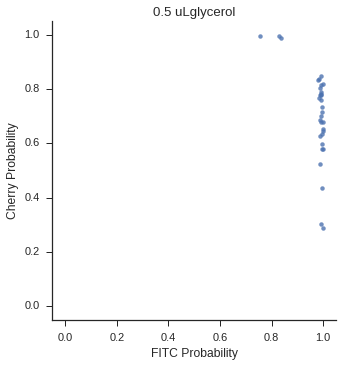

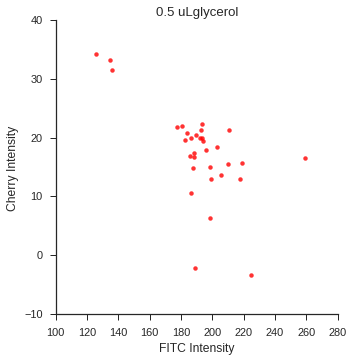

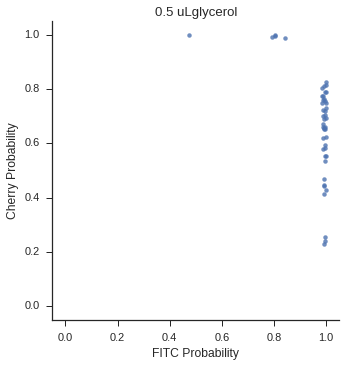

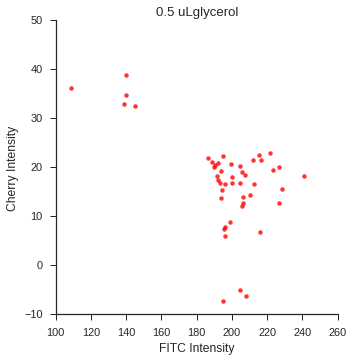

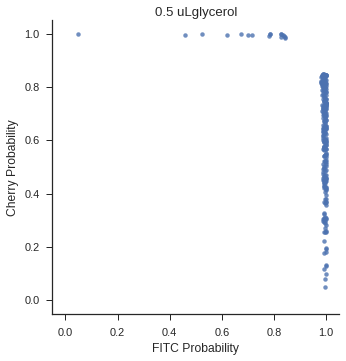

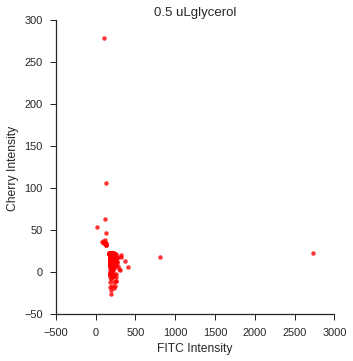

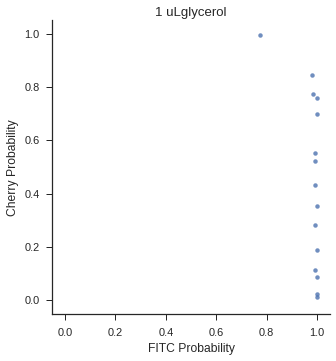

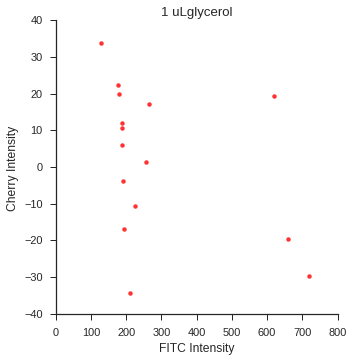

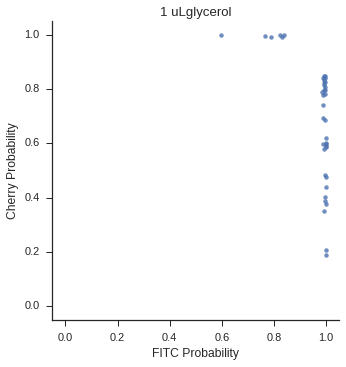

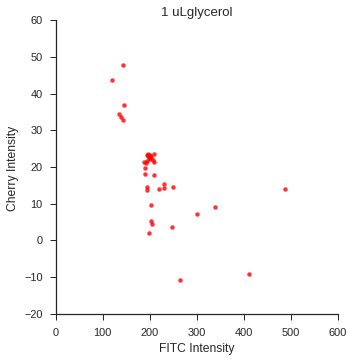

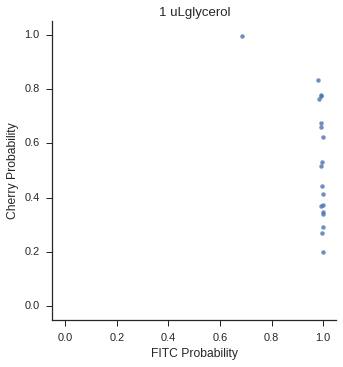

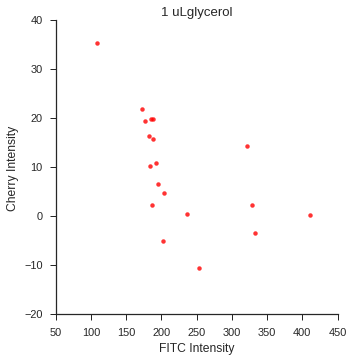

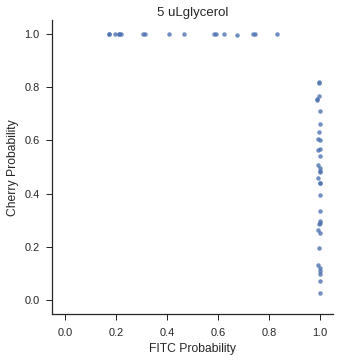

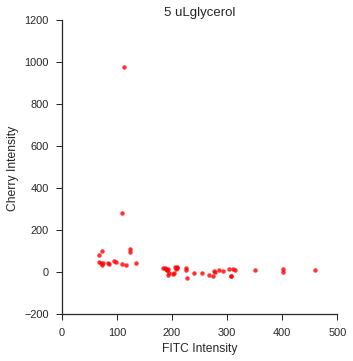

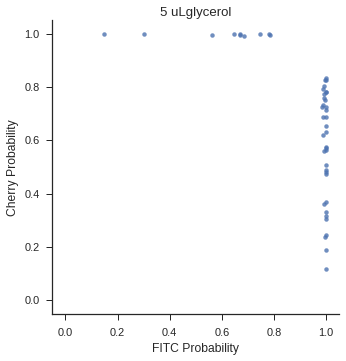

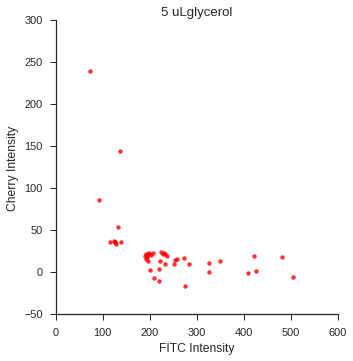

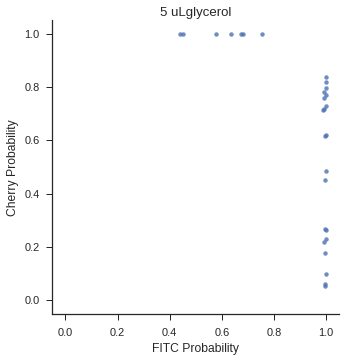

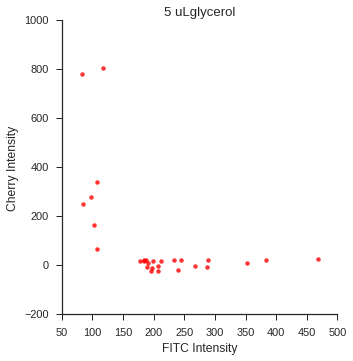

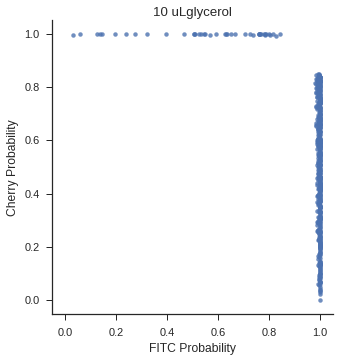

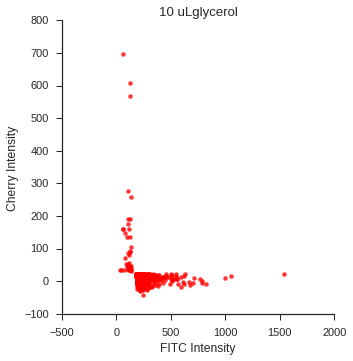

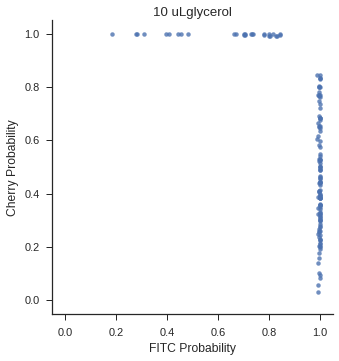

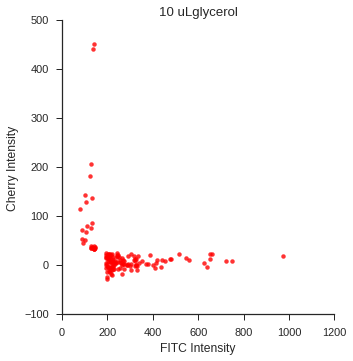

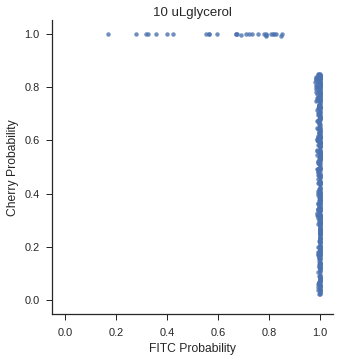

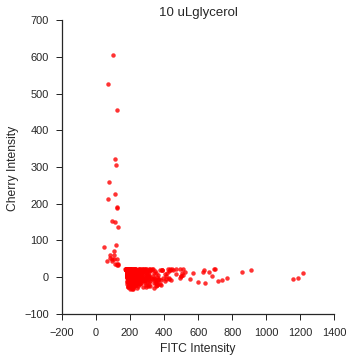

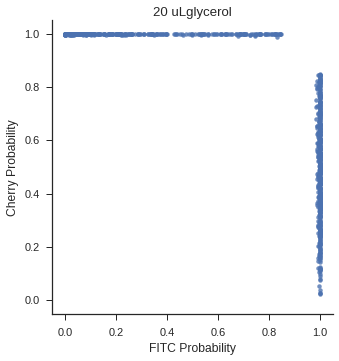

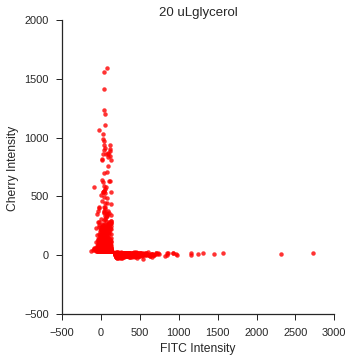

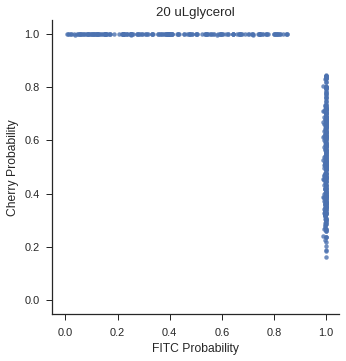

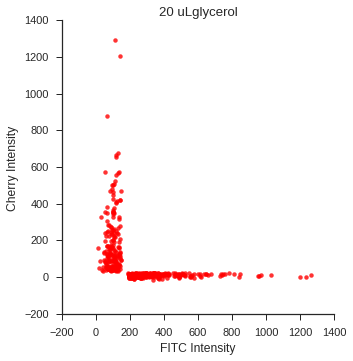

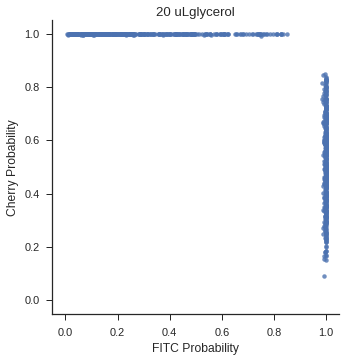

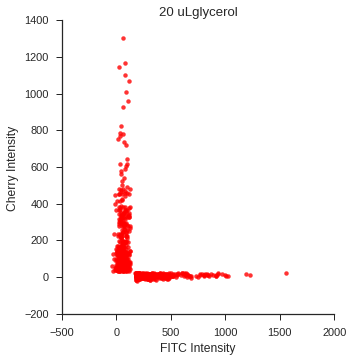

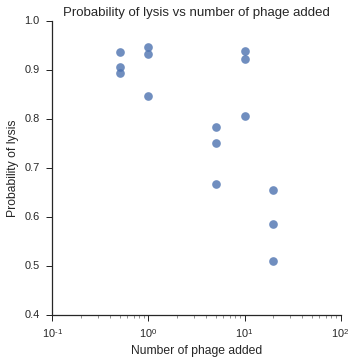

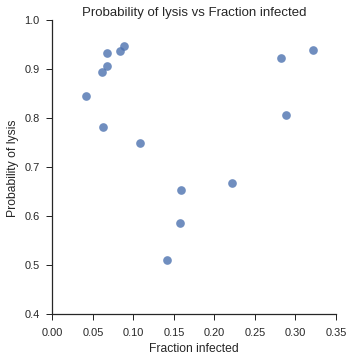

In [39]:
# Use the no phage control to construct a lysis/lysogeny classifier
carbon = 'glycerol'

phage_conc = []
frac_infected = []
p_ly = []
for row in row_data:
    for col in carbon_source[carbon]:
        
        fitc_control_array = np.array(mean_FITC_control['A' + str(col)])
        cherry_control_array = np.array(mean_cherry_control['A' + str(col)])
        kernel_fitc = scipy.stats.gaussian_kde(fitc_control_array)
        kernel_cherry = scipy.stats.gaussian_kde(cherry_control_array)

        well = row + str(col)
        p_value = p_values_dict[well]
        infected_cells = np.where(p_value < 0.01)[0]
        fitc_list = np.array(mean_FITC[well])[infected_cells]
        cherry_list = np.array(mean_cherry[well])[infected_cells]

    
        p_fitc = []
        p_cherry = []
        for fitc, cherry in zip(fitc_list, cherry_list):
            p_fitc += [1-kernel_fitc.integrate_box_1d(fitc, 1e6)]
            p_cherry += [1-kernel_cherry.integrate_box_1d(cherry, 1e6)]

        # Remove double positives
        p_fitc_new = []
        p_cherry_new = []
        fitc_list_new = []
        cherry_list_new = []
        for p_f, p_c, f, c in zip(p_fitc, p_cherry, fitc_list, cherry_list):
            if p_f < 0.85 or p_c < 0.85:
                p_fitc_new += [p_f]
                p_cherry_new += [p_c]
                fitc_list_new += [f]
                cherry_list_new += [c]

        p_fitc = p_fitc_new
        p_cherry = p_cherry_new
        fitc_list = fitc_list_new
        cherry_list = cherry_list_new

        d = {'FITC Probability': p_fitc, 'Cherry Probability': p_cherry}
        dataframe = pd.DataFrame(data = d)
        grid = sns.lmplot('FITC Probability', 'Cherry Probability', dataframe, fit_reg = False)
        ax = grid.axes[0][0]
        ax.set_title(str(reverse_phage_added[well[0]]) + ' uL' + carbon)
        ax.set_xlim([-0.05, 1.05])
        ax.set_ylim([-0.05, 1.05])

        d = {'FITC Intensity': fitc_list, 'Cherry Intensity': cherry_list}
        dataframe = pd.DataFrame(data = d)
        grid = sns.lmplot('FITC Intensity', 'Cherry Intensity', dataframe, fit_reg = False, scatter_kws = {'color': 'red'})
        ax = grid.axes[0][0]
        ax.set_title(str(reverse_phage_added[well[0]]) + ' uL' + carbon)

        counter = 0
        for p_f, p_c in zip(p_fitc, p_cherry):
            if p_f > p_c:
                counter += 1
        if len(p_fitc) > 0:
            print well, np.float(counter)/len(p_fitc), counter, len(p_fitc)
            fraction_infected = np.float(np.where(p_value < 0.01)[0].shape[0])/np.float(p_value.shape[0])
            frac_infected += [fraction_infected]
            phage_conc += [reverse_phage_added[well[0]]]
            p_ly += [np.float(counter)/len(p_fitc)]

d = {'Number of phage added': phage_conc, 'Fraction infected':frac_infected, 'Probability of lysis': p_ly}
dataframe = pd.DataFrame(data = d)
grid = sns.lmplot('Number of phage added', 'Probability of lysis', dataframe, fit_reg = False, scatter_kws={"s": 75})
ax = grid.axes[0][0]
ax.set_title('Probability of lysis vs number of phage added')
ax.set_xscale('log')

grid = sns.lmplot('Fraction infected', 'Probability of lysis', dataframe, fit_reg = False, scatter_kws={"s": 75})
ax = grid.axes[0][0]
ax.set_title('Probability of lysis vs Fraction infected')
